# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
# Mounting Google Colab drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
import random

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

from tensorflow.keras import backend

backend.clear_session()

**Let us check the version of tensorflow.**

In [ ]:
print(tf.__version__)

2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
import h5py #This is the python library that opens the HDF5 files
file_path = '/content/drive/MyDrive/MIT/elective_project/SVHN_single_grey1.h5'

with h5py.File(file_path, 'r') as f:
    # This will print the keys at the root level (as a list), a little peak inside to see how the dataset is setup.
    # The keys will be the equivalent of pandas columns
    print(list(f.keys()))
    X_train = f['X_train'][:]
    y_train = f['y_train'][:]
    X_test = f['X_test'][:]
    y_test = f['y_test'][:]


['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

# This is not required for now, but we can look inside the X_train set and see what is inside the first set.
#print(X_train[0])
#print(len(X_train[0]))
# We discovered that each image is a 32x32 pixel image in a form of a np matrix.

(42000, 18000)

**Observation:**
There are 42,000 images in the Training set and 18,000 images in the Testing set. Each image is a matrix of numbers, which in turn contains the vales of the individual pixels.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

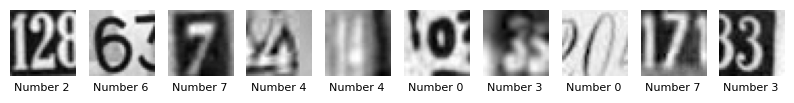

In [ ]:
#Since the images are in the form of a matrix, we can use the handy function from Matplotlib called "figure".
#It creates a blank canvas in which the individual pixes are plotted.
plt.figure(figsize = (10, 1))

#We iterate through the first 10 images (matrices).
for i in range(10):

    # iterates through the subplot, 1 number of rows, 10 numer of columns and iterator for individual images.
    plt.subplot(1, 10, i+1)

    # We insert each image into the canvas we created and show it with a contrast color map called "gray'.
    # Note: these are not real colors in the image, but only to signify the difference between the numbers of the matrix.
    plt.imshow(X_train[i], cmap='gray')

    # Let's turn the labels and the axis off since they will be in the way of seeing the image as it is.
    plt.axis('off')

    # We can show the labels from Y_train set for each number
    plt.text(15, 40, f'Number {y_train[i]}', ha='center', va='bottom', color='black', fontsize=8)
# Plots the result of the for loop.
plt.show()


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

Print the shapes of Training and Test data

In [ ]:
# Prints the shape of the first dataset which is 32 pixels by 32 pixels, hence a matrix of 1024 total pixels.
# If the image was in color RGB, each "channel" will have its own matrix of 32x32 pixels, making the calculations a lot more cumbersome.
# Let's stick with black and white pitures (grayscale with 255 graduation of gray with 0 being black and 255 white)
print("Shape:", X_train[0].shape)

Shape: (32, 32)


In [ ]:
# Let's take a look at the first image set in terms of numerical matrix.
print("First image:\n", X_train[0])

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Flattens the dataset by using reshaping fom numpy into 1D array without changing the data. Just the shape.
X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

In [ ]:
# Prints the shape of the Training and Test data sets.
print("Train data shape set:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Train data shape set: (42000, 1024) (42000,)
Test data shape: (18000, 1024) (18000,)


### **Normalize the train and the test data**

In [ ]:
# Normalizing data means fitting all data in a 0-1 interval in our case.
# Normalized Value= Max Value/Original Value

# Normalize reshaped training data
X_train_normalized = X_train / 255.0

# Normalize reshaped testing data
X_test_normalized = X_test / 255.0

### **One-hot encode output**

In [ ]:
# This part turns the categorical values into a matrix so that it can be used in a context of comparing and pairing it to the other matrices contained in X_train which are all pictures.

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

In [ ]:
# Prints the list of all the labels in a one-hot encoded format which is a list of matrices.

print(y_test)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


**Observation:**
To be noted that if we want to see the first element of the list, it will show an interesting set:

print(y_test[0])

[0,1,0,0,0,0,0,0,0,0] <--- this means, that the label has been "hot-encoded" for the number 2 (second element has a 1), which is also the number corresponding in our X_train.
So the labels are corresponding the correct images.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
# Let's set up a seed of 42 for now and see if it works well. We need to set it up the same in all random generators in order to maintain reproducibility.
# Fun fact:
# The use of the seed "42" is more of a convention and cultural reference within the programming and data science community rather than a strict requirement.
# It has become a sort of "magic number" that people use when setting random seeds in their code. The choice of "42" is a nod to Douglas Adams' science fiction series
# "The Hitchhiker's Guide to the Galaxy," where the number 42 is famously described as the "Answer to the Ultimate Question of Life, the Universe, and Everything."

# In NumPy
np.random.seed(42)

# In the generic python funcion
random.seed(42)

# And TensorFlow
tf.random.set_seed(42)

# I also set up a function for seed selection here so I can reuse it later.
# It does the same thing but I can call it with one line of code to reuse it.

def seed_setup():
  np.random.seed(42)
  random.seed(42)
  tf.random.set_seed(42)


### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
input_shape = 1024 # the 32x32 images
num_classes = 10 # how many different categories of images we have (1,2,3,4,5,6,7,8,9,0)

def nn_model_1(input_shape, num_classes):
    # Creates a Sequential Model. It is a simple model in which there is one tensor as input and one as output
    model = Sequential()

    # First hidden layer with 64 nodes and ReLU activation as requested.
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))

    # Second hidden layer with 32 nodes and ReLU activation again.
    model.add(Dense(32, activation='relu'))

    # Output layer with 'softmax' activation and number of nodes equal to the number of classes
    model.add(Dense(num_classes, activation='softmax'))

    # Compiles the model using categorical crossentropy whch is a commonly used loss function for multi-class classification problems
    # where each sample belongs to exactly one class out of two or more classes, like in our case.
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

# Creates the model
model = nn_model_1(input_shape, num_classes)

# Prints the summary of the model
model.summary()

# Fits the model on the train data with a validation split of 0.2
history = model.fit(X_train_normalized, y_train,
                    validation_split=0.2,
                    batch_size=128,
                    verbose=1,
                    epochs=20)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
263/263 [==============================] - 3s 8ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 2s 6ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [============

### **Plot the Training and Validation Accuracies and write down your Observations.**

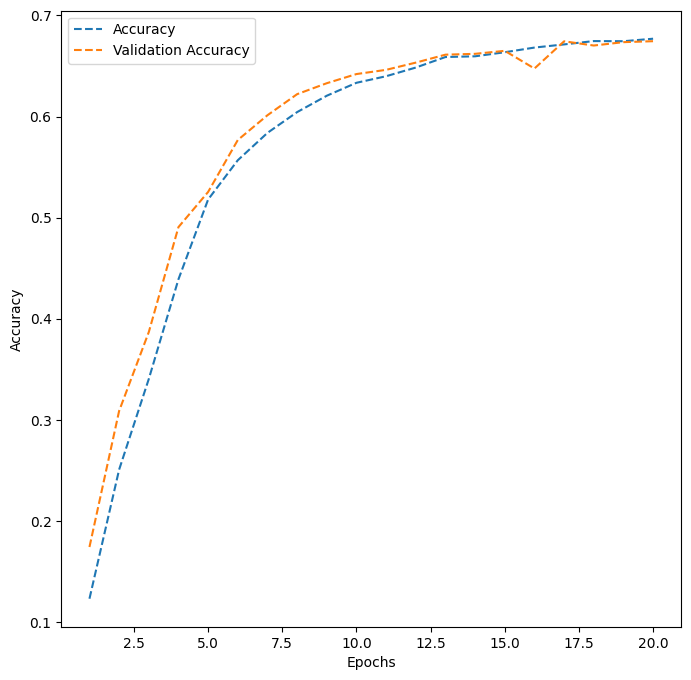

In [ ]:
# Plotting the accuracies together.

# Extracts the training history from a Keras model and stores it in a dictionary. This is useful since dictionaries in python are pairs
# of key-values, just like the project we are working on.
dict_hist = history.history

# Creates a list of all Epochs
list_ep = [i for i in range(1, 21)]

# Creates a space to plot the graph in MatPlotLib
plt.figure(figsize = (8, 8))

# Plots the first line Accuracy in Blue
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'Accuracy')

# Plots the second line Validation Accuracy in Yellow
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'Validation Accuracy')

# Sets the label for axis Y
plt.ylabel('Accuracy')

# Sets the label for axis X
plt.xlabel('Epochs')

# Sets the legend for the graph
plt.legend()

# Plots the actual graph on the screen.
plt.show()

**Observations:**

**1. Initial Training (Epochs 1-4):**

Smooth Increase with a Gap: A smooth and parallel increase in both accuracy and validation accuracy suggests that at first the model is learning well from the training data. The gap between them indicates that the model is not overfitting to the training data, as the validation accuracy is slightly different than the training accuracy.


**2. Plateau (Epochs 5-14):**

Turning and Plateauing: However the turning and plateauing of both lines suggest that the model is encountering some difficulty in learning beyond a certain point. The fact that the validation accuracy is higher than the training accuracy (around Epoch 6) could indicate that the model is generalizing well to unseen data, which is positive.

Accuracy around 0.6: An accuracy of 0.5 -0.65 suggests that the model is performing at almost chance level, indicating that it's struggling to learn patterns from the data. This might be due to issues such as insufficient model complexity, inadequate training data, or suboptimal hyperparameters.


**3. Sudden Fragmentation and Convergence (Epochs 15-20):**

Fragmentation of Validation Accuracy: The sudden fragmentation in the validation accuracy line around Epoch 15 could indicate that the model started to overfit the training data or that there might be some noise in the validation set.

Intersection and Convergence: The intersection of the two lines followed by convergence suggests that the model might have corrected some issues that were causing overfitting. However, the fact that they join and become one line could indicate that the model is now fitting the training data too closely, potentially leading to overfitting.



**Possible Improvements and Pitfalls:**
**Early Stopping:** It might be useful consider early stopping to prevent overfitting. This involves monitoring the validation performance and stopping training when it starts to degrade. However in our case the model will only have accuracy around 0.62, which is almost a chance accuracy so early stopping will not improve accuracy.



**Model Complexity:** Adjusting the complexity of the model. If it's too simple, it might struggle to capture the underlying patterns in the data. If it's too complex, it might overfit. Maybe more testing in this area would benefit the hypothesis that the model can perform better.


**Data Quality:** It is useful to ensure that the training and validation datasets are representative and free from noise.


**Hyperparameter Tuning:** Experimenting with different hyperparameter settings, such as learning rates and regularization, to find optimal values for the specific problem could make the model better.


In summary, while at the start the training looks promising, the plateauing and subsequent convergence with a sudden drop in validation accuracy suggest that the model might benefit from adjustments to prevent overfitting and improve its ability to generalize to unseen data. I would suggest to consider experimenting with the suggested improvements to fine-tune the model if not replacing the model entirely and focus on a different approach. Let's reject this model for now and see if we can change things a little.



Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing the backend in Keras
backend.clear_session()

#Calling our handy function to reset the seed
seed_setup()


### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
input_shape = 1024 # the 32x32 images
num_classes = 10 # how many different categories of images we have (1,2,3,4,5,6,7,8,9,0)

def nn_model_2(input_shape, num_classes):
    model = Sequential()

    # First hidden layer with 256 nodes and ReLU activation
    model.add(Dense(256, activation='relu', input_shape=(input_shape,)))

    # Second hidden layer with 128 nodes and ReLU activation
    model.add(Dense(128, activation='relu'))

    # Add Dropout layer with a rate of 0.2
    model.add(Dropout(0.2))

    # Third hidden layer with 64 nodes and ReLU activation
    model.add(Dense(64, activation='relu'))

    # Fourth hidden layer with 64 nodes and ReLU activation
    model.add(Dense(64, activation='relu'))

    # Fifth hidden layer with 32 nodes and ReLU activation
    model.add(Dense(32, activation='relu'))

    # Add BatchNormalization layer
    model.add(BatchNormalization())

    # Output layer with 'softmax' activation and number of nodes equal to the number of classes
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.0005),
                  metrics=['accuracy'])

    return model

# Create the model using the nn_model_2 function
model_2 = nn_model_2(input_shape, num_classes)

# Print the summary of the model
model_2.summary()

# Fit the model on the train data with a validation split of 0.2
history = model_2.fit(X_train_normalized, y_train,
                    validation_split=0.2,
                    batch_size=128,
                    verbose=1,
                    epochs=30)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

### **Plot the Training and Validation Accuracies and write down your Observations.**

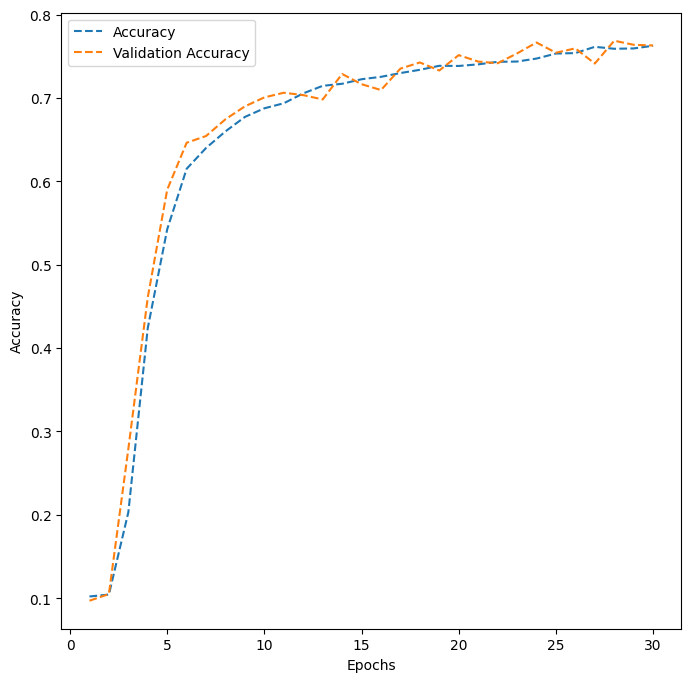

In [ ]:
# Plotting the accuracies together.

# Extracts the training history from a Keras model and stores it in a dictionary.
dict_hist = history.history

# Creates a list of all Epochs
list_ep = [i for i in range(1, 31)]

# Creates a space to plot the graph in MatPlotLib
plt.figure(figsize = (8, 8))

# Plots the first line Accuracy
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'Accuracy')

# Plots the second line Validation Accuracy
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'Validation Accuracy')

# Sets the label for axis Y
plt.ylabel('Accuracy')

# Sets the label for axis X
plt.xlabel('Epochs')

# Sets the legend for the graph
plt.legend()

# Plots the actual graph on the screen.
plt.show()

**Observations:**
Although the accuracy increased, the model seems to be slightly overfitted.
The biggest take from this graph is this: while training accuracy increases (blue line) all the way to Epoch 11, the validation accuracy is somewhat segmented, even though it is higher than training accuracy. The model might not be generalizing well and picking up some noise.
There could be a couple of resons:

1.   The model is too complex with too many layers and might be mildly overfitting
2.   The model might produce excessive amount of noise data
3. The model is too sensitive to changes in validation data


In other words, adding more complexity to an ANN model might not lead to a better performing model. Let's reject this model too for now.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
# We can use the .predict method to make our predictions.
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 2s 3ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Converts back to the original labels from the matrix coded by one-hot-encoding.
y_test = np.argmax(y_test, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.87      0.63      0.73      1814
           1       0.57      0.73      0.64      1828
           2       0.69      0.74      0.71      1803
           3       0.62      0.66      0.64      1719
           4       0.64      0.82      0.72      1812
           5       0.71      0.63      0.67      1768
           6       0.82      0.65      0.72      1832
           7       0.58      0.84      0.69      1808
           8       0.83      0.54      0.65      1812
           9       0.74      0.62      0.67      1804

    accuracy                           0.68     18000
   macro avg       0.71      0.68      0.68     18000
weighted avg       0.71      0.68      0.68     18000



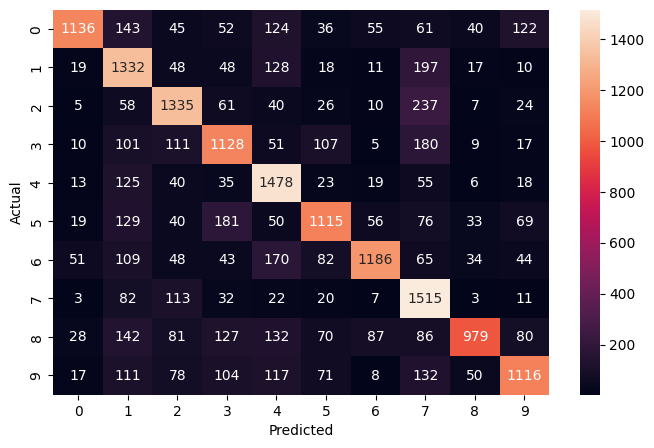

In [ ]:
# Printing the classification report using the sklearn method.
print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix using another sklearn method.
cm = confusion_matrix(y_test, test_pred)

# Plots the confusion matrix
plt.figure(figsize = (8, 5))

# Uses seaborn library to show the heatmap
sns.heatmap(cm, annot = True,  fmt = '.0f')

# Assigns label to the y axis
plt.ylabel('Actual')

# Assigns label to the x axis
plt.xlabel('Predicted')

# Plots the result.
plt.show()

**Final Observations:**
From the confusion matrix we can see the following:
1. Precision was 71% (macro average) which is the ratio of true positive predictions to the total number of predicted positive.
Precision is relatively high for classes 0, 5, 6, 8 and 9, indicating that when the model predicts these classes, it tends to be correct. Classes 0 and 8, in particular, have high precision values (0.87 and 0.83, respectively).
Precision is lower for classes 1, 3, and 7, suggesting that the model is more prone to false positives for these classes. It identifies an image as a certain number, when in reality it made a mistake.




2. Recall was 68% and it is the ratio of true positive predictions to the total number of actual number images. It measures the ability of the model to get all the images, indicating how many of the actual true images are correctly predicted. Recall is relatively high for classes 1, 2, 4, and 7, indicating that the model is effective at capturing a significant proportion of true instances for these classes.
Recall is lower for classes 0, 3, 5, 6, 8, and 9, suggesting that the model misses a notable number of instances for these classes. The model misses a lot...




3. The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
F1-scores are generally in the range of 0.64 to 0.73, with higher values for classes 0, 2, 4, and 6.




4. The overall accuracy is 0.68, indicating that the model correctly predicted the class labels for 68% of the images in the test set.


5. Macro-Average and Weighted-Average: The macro-averaged precision, recall, and F1-score are around 0.71, suggesting a reasonably balanced performance across all classes when each class is given equal weight.
The weighted averages take into account class imbalances, and they are also around 0.71.

**Key Points to Note:**
The model performs well for certain classes (e.g., 0, 4, 6) and less effectively for others (e.g., 1, 3, 8).
Class imbalances should be considered, as the macro and weighted averages provide a more comprehensive view of overall performance.


When analyzing the current model's performance, it is important to consider the precision and recall trade-offs. For example, if false positives are more critical, precision becomes more important like in our case.

The model is basically useless if it misclassifies numbers in a large scale. This model seems to be misclassifing around 32% of the times.


In summary, while the model shows reasonable performance, there is room for improvement, especially for classes with lower precision and recall values. Further optimization, tuning, or considering alternative model architectures (like a Convolutional Neural Network which is specifically designed to deal with grid-like data such as an image which is nothing more or less than a grid of pixels) may help enhance performance for specific classes. Let's reject this model too and try something else.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
# we ran this code previously to load the hdf5 file.
with h5py.File(file_path, 'r') as f:
    print(list(f.keys()))
    X_train = f['X_train'][:]
    y_train = f['y_train'][:]
    X_test = f['X_test'][:]
    y_test = f['y_test'][:]

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
It confirms the same amount of images so the dataset loaded correctly.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Let's check the shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print("First image:\n", X_train[0])

Shape: (32, 32)
First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# Since we always have to have a 4D array as input to CNNs, we need to reshape the arrays.

# 4D array:
# 1 Batch size
# 2 Height of the image
# 3 Width of the image
# 4 Number of channels (e.g., 3 for RGB or 1 for grayscale)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
# Normalizes inputs from 0-255 to 0-1 like before

X_train = X_train / 255.0

X_test = X_test / 255.0

Print New shape of Training and Test

In [ ]:
# Let's see what the new shape looks like for both Training set and Test set:
print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
# Again we turn the y_train and y-test variables into a matrix that is one-hot encoded.

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

In [ ]:
# Prints the contents of the converted matrix
print(y_test)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


**Observation:**
Our dataset is ready to be put to use in a Convolutional Network.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
# We are reusing the function created before to set all seeds.
seed_setup()

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
# Importing libraries that are used in CNN
from keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

def cnn_model_1():
    model = Sequential()

    # First Convolutional layer
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))

    # Second Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))

    # Max-pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flattens the output
    model.add(Flatten())

    # Dense layer
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compiles the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

# Builds the CNN model
cnn_model_1 = cnn_model_1()

# Prints the model summary
cnn_model_1.summary()

# Fits the model (Assuming you have X_train, y_train as the training data)
history_cnn_model_1 = cnn_model_1.fit(X_train, y_train,
                                      validation_split=0.2,
                                      batch_size=32,
                                      verbose=1,
                                      epochs=20)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                      

### **Plot the Training and Validation Accuracies and Write your observations.**

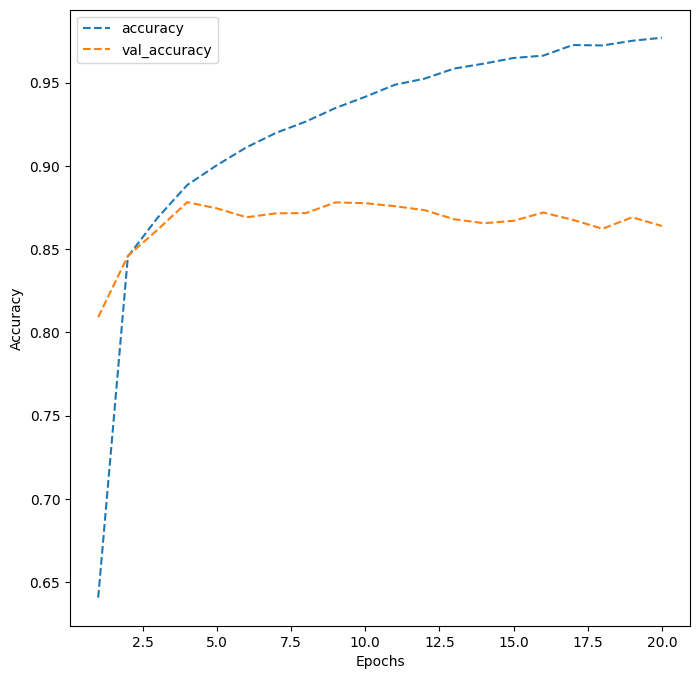

In [ ]:
# Plotting the accuracies, see explanation of code above. It is the same code with different parameters.

dict_hist = history_cnn_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**


**1. Initial Training (Epochs 1-2):**


Blue Line (Training Accuracy): The smooth increase in the training accuracy up to 0.99 suggests that the model is learning well from the training data and is capable of fitting the training set almost perfectly.

Yellow Line (Validation Accuracy): The initial increase in the validation accuracy for the first two epochs indicates that the model is able to generalize to the validation set initially.


**2. Fragmentation and Plateau of Yellow Line (Epochs 3-20):**

Yellow Line (Validation Accuracy): The fragmentation and subsequent plateau of the validation accuracy line indicate that the model is struggling to generalize beyond a certain point. The fact that it plateaus at 0.87 suggests that the model is reaching a performance limit on unseen data, and it might be overfitting to the training set.

Blue Line (Training Accuracy): The continued smooth increase in training accuracy (up to 0.99) suggests that the model is still able to fit the training data well, but this may be contributing to overfitting.
The decrease in validation accuracy towards the end of training (down to 0.85) indicates that the model might be overfitting more severely as training progresses.


**Possible Improvements and Pitfalls:**
The model is likely overfitting to the training data, as evidenced by the large gap between training and validation accuracy. Overfitting occurs when the model memorizes the training set instead of learning general patterns. Using techniques like dropout or regularization to mitigate overfitting could help.

Incorporating Data Augmentation into the training pipeline. Data augmentation can help expose the model to more diverse examples during training, potentially improving generalization.

Experimenting with different learning rates can be useful. A learning rate that is too high might cause the model to overshoot optimal parameter values, while a too-low learning rate might slow down or hinder convergence.

Architecture Complexity: Assess the complexity of the model. If the model is too complex for the given data, it might memorize noise instead of learning useful patterns.
Early Stopping: Implements early stopping to monitor the validation performance and stops training when it starts to degrade, preventing overfitting.



In summary, the model is likely suffering from overfitting, and addressing this issue through regularization techniques, data augmentation, and careful hyperparameter tuning may lead to better generalization on unseen data. Let's reject this model too.







Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing the backend in Keras
backend.clear_session()

#Calling our handy function to reset the seed
seed_setup()

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
# Let's build a more complex CNN model and see if we can take care of the overfitting issue.
from keras.layers import Conv2D, LeakyReLU, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from keras.optimizers import Adam

def cnn_model_2():
    model = Sequential()

    # First Convolutional layer
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))

    # Second Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))

    # Max-pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Batch Normalization
    model.add(BatchNormalization())

    # Third Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))

    # Fourth Convolutional layer
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))

    # Max-pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Batch Normalization
    model.add(BatchNormalization())

    # Flatten the output
    model.add(Flatten())

    # Dense layer
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))

    # Dropout layer
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

# Builds the model
cnn_model_2 = cnn_model_2()

# Prints the model summary
cnn_model_2.summary()

# Fits the model (Assuming you have X_train, y_train as training data)
history_cnn_model_2 = cnn_model_2.fit(X_train, y_train,
                                      validation_split=0.2,
                                      batch_size=128,
                                      verbose=1,
                                      epochs=30)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

### **Plot the Training and Validation accuracies and write your observations.**

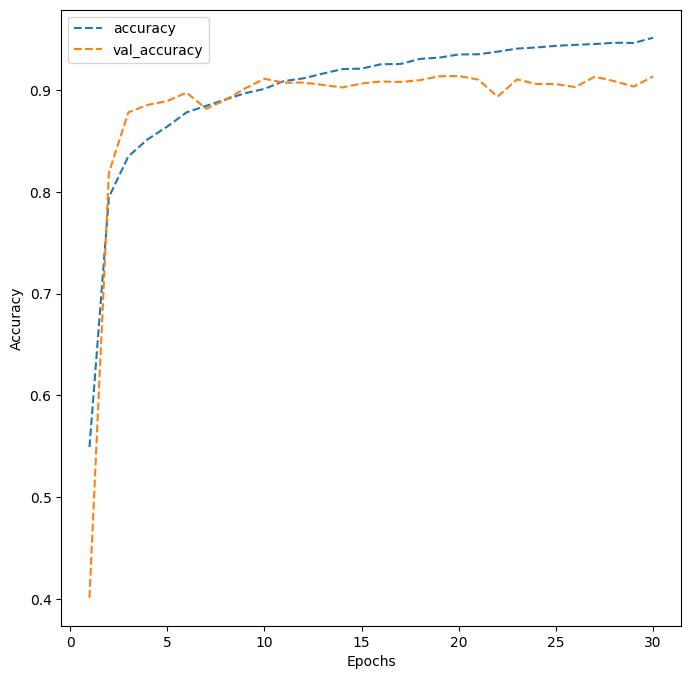

In [ ]:
# Plotting the accuracies, as before see explanation of code above. It is the same code with different parameters.

dict_hist = history_cnn_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**


**1. Initial Training (Epochs 1-2):**
**Both Blue and Yellow Lines:** The fact that both training and validation accuracies reach over 0.80 within the first two epochs is a positive sign. It suggests that the model quickly learns and generalizes well from the training data to the validation data.


**2. Training Phase (Epochs 3-30):**


>**Blue Line (Training Accuracy):** The continuous rise in the training accuracy and reaching almost 100% towards the end of 30 epochs indicates that the model is capable of fitting the training data extremely well. The high training accuracy could be a sign of potential overfitting, especially if the validation accuracy does not follow a similar trend.


>**Yellow Line (Validation Accuracy):** The initial plateau and bouncing around the blue line up to epoch 10 might indicate some instability in the training process. However, the stabilization around epoch 10 with an accuracy of 0.91 is a good sign. The stability in validation accuracy suggests that the model is generalizing well to unseen data.

**Possible Observations and Considerations:**
>**Overfitting:** The high training accuracy raises the concern of potential overfitting, especially if the validation accuracy does not improve or starts degrading. It might be useful applying regularization techniques (e.g., dropout, L2 regularization) or reducing model complexity to mitigate overfitting.

>**Plateau in Validation Accuracy:** The plateau in validation accuracy around 0.91 suggests that the model may have reached its optimal performance on the validation set. This is not necessarily a problem, but it's worth investigating whether further improvements can be made, such as adjusting model architecture or hyperparameters.

>A learning rate that is too high could cause the model to oscillate or fail to converge, while a too-low learning rate could slow down the learning process.

**Possible Improvements:**
>**Regularization:** Experiments with dropout layers should be performed, batch normalization, or other regularization techniques to reduce overfitting. This will require some computational time but it needs to be evaluated if the model wants to be improved.

>**Learning Rate Schedule:** Implementing a learning rate schedule to adaptively adjust the learning rate during training. This can help with convergence and stability.

>**Model Complexity:** Evaluating whether the model is too complex for the given data. Reducing the number of layers or neurons might help prevent overfitting.


**Conclusion:**
Finally overall, the model's ability to quickly achieve high accuracy is positive, but attention should be paid to potential overfitting and the stabilization of the validation accuracy. Fine-tuning hyperparameters and experimenting with model modifications can help achieve the best balance between training and validation performance. The CNN models (both) improved things from using an ANN model and the last CNN model is the one that "wins the race" in best performance. This is the model I will use.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
# We can use the .predict method to make our predictions.
test_pred = cnn_model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 26s 46ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Converts back to the original labels from the matrix coded by one-hot-encoding.
y_test = np.argmax(y_test, axis = -1)

### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1814
           1       0.92      0.89      0.91      1828
           2       0.93      0.91      0.92      1803
           3       0.91      0.88      0.90      1719
           4       0.96      0.90      0.93      1812
           5       0.91      0.91      0.91      1768
           6       0.92      0.88      0.90      1832
           7       0.92      0.94      0.93      1808
           8       0.87      0.91      0.89      1812
           9       0.88      0.93      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



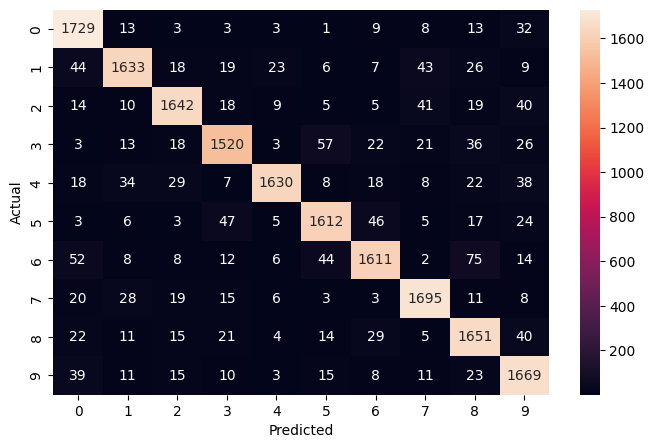

In [ ]:
# Printing the classification report using the sklearn method.
print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix using another sklearn method.
cm = confusion_matrix(y_test, test_pred)

# Plots the confusion matrix
plt.figure(figsize = (8, 5))

# Uses seaborn library to show the heatmap
sns.heatmap(cm, annot = True,  fmt = '.0f')

# Assigns label to the y axis
plt.ylabel('Actual')

# Assigns label to the x axis
plt.xlabel('Predicted')

# Plots the result.
plt.show()

**Final Observations:**

**Precision, Recall, and F1-Score:**

**Precision:** This new model performs much better! it has a high lever of accuracy, for example for class 0, 89% of the instances predicted as 0 were actually 0 and for class 4 it goes up to 96% of accuracy which is close to perfection.



**Recall:** Recall is also great. For instance, for class 0, 95% of the actual instances of 0 were correctly predicted.



**F1-Score:** Also great results! For instance, for classes 4 and 7, the F1-score is 0.93 (93%), indicating a good balance between precision and recall.



**Support:** This is the number of actual occurrences of each class in the specified dataset. For instance, there are 1814 instances of class 0 in the dataset.




**Accuracy**: The overall accuracy of this model across all classes is 91%, meaning it correctly classified 91% of the instances which is a pretty good result especially if compared to the other models we have used.



**Macro and Weighted Averages:** The average precision, recall, and F1-score calculated independently for each class and then averaged. This metric gives equal weight to each class.



**Weighted Avg:** Similar to the macro average, but it takes into account the number of instances of each class. This provides an average that is weighted by the number of instances in each class.



**Final Interpretation:**
The model seems to perform well, with high precision, recall, and F1-scores for most classes.
The macro and weighted averages are also high, indicating good overall performance.
The model is particularly good at distinguishing between classes 0, 1, 2, 4, and 7.
It performs slightly less well on classes 8 and 9, with lower precision and recall.




**Possible Improvements:**

We should investigate further why the model is performing less well on certain classes. This could involve exploring the dataset, examining misclassified instances, and potentially adjusting the model architecture or training parameters.

Experimenting with different model architectures, hyperparameters, or even exploring more advanced techniques like ensemble methods could be useful to potentially improve performance further.



Overall, this last CNN model, surpassess the other ones we used.

A classification report with high precision, recall, and F1-scores, especially on a dataset with multiple classes, is a positive sign, and the model appears to be doing a great job. I would pick this model out of the other ones.





